In [79]:
# Import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.preprocessing import label_binarize


# Scikit learn libraries
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import scipy.optimize as opt
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, jaccard_score, log_loss
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.model_selection import cross_validate

import warnings
warnings.filterwarnings("ignore")

**Part 1: Data preparation**

In [80]:
# Import data
url_train = "https://raw.githubusercontent.com/michaelwozniak/ML-in-Finance-I-case-study-forecasting-tax-avoidance-rates/refs/heads/main/data/output/train_fe.csv"
df_train = pd.read_csv(url_train)
df_train.head()

,Unnamed: 0,Ticker,Nazwa2,rok,ta,txt,pi,str,xrd,ni,...,intan_ma,ppe_ma,sale_ma,cash_holdings_ma,roa_past,lev_past,intan_past,ppe_past,sale_past,cash_holdings_past
0,0,11B PW Equity,11 bit studios SA,2005,21.127613,1.24185,6.329725,0.19,0.0,5.0879,...,0.198598,0.013076,0.445954,0.574744,0.240818,0.0,0.198598,0.013076,0.445954,0.574744
1,1,11B PW Equity,11 bit studios SA,2006,21.127613,1.24185,6.329725,0.19,0.0,5.0879,...,0.198598,0.013076,0.445954,0.574744,0.240818,0.0,0.198598,0.013076,0.445954,0.574744
2,2,11B PW Equity,11 bit studios SA,2007,21.127613,1.24185,6.329725,0.19,0.0,5.0879,...,0.198598,0.013076,0.445954,0.574744,0.240818,0.0,0.198598,0.013076,0.445954,0.574744
3,3,11B PW Equity,11 bit studios SA,2008,21.127613,1.24185,6.329725,0.19,0.0,5.0879,...,0.198598,0.013076,0.445954,0.574744,0.240818,0.0,0.198598,0.013076,0.445954,0.574744
4,4,11B PW Equity,11 bit studios SA,2009,21.127613,1.24185,6.329725,0.19,0.0,5.0879,...,0.198598,0.013076,0.445954,0.574744,0.240818,0.0,0.198598,0.013076,0.445954,0.574744


In [81]:
url_test = "https://raw.githubusercontent.com/michaelwozniak/ML-in-Finance-I-case-study-forecasting-tax-avoidance-rates/refs/heads/main/data/output/test_fe.csv"
df_test = pd.read_csv(url_test)
df_test.head()

,Unnamed: 0,Ticker,Nazwa2,rok,ta,txt,pi,str,xrd,ni,...,intan_ma,ppe_ma,sale_ma,cash_holdings_ma,roa_past,lev_past,intan_past,ppe_past,sale_past,cash_holdings_past
0,11,11B PW Equity,11 bit studios SA,2016,45.649399,2.8015,15.730800,0.19,0.0,12.929300,...,0.130887,0.009081,0.539652,0.527618,0.352416,0.000000,0.194652,0.013346,0.534162,0.699963
1,23,1AT PW Equity,Atal SA/Poland,2016,1513.552979,15.9150,109.042999,0.19,0.0,89.442001,...,0.066162,0.007559,0.360836,0.100509,0.039084,0.196057,0.052127,0.006567,0.171832,0.107148
2,35,4FM PW Equity,4Fun Media SA,2016,41.662998,0.3202,1.489200,0.19,0.0,1.346000,...,0.496920,0.087819,0.470287,0.056824,0.067262,0.014443,0.564584,0.152826,0.469210,0.042710
3,47,AAL LN Equity,Anglo American PLC,2016,50149.000000,698.0000,2624.000000,0.20,1594.0,28719.000000,...,0.062258,0.001563,0.337668,0.117395,0.569492,0.345433,0.065253,0.001596,0.331651,0.132563
4,59,ABC PW Equity,ABC Data SA,2016,1252.895020,5.0190,22.233000,0.19,0.0,17.135000,...,0.045939,0.005163,1.820588,0.032882,0.043842,0.090251,0.043249,0.004455,1.713010,0.030002


In [82]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3993 entries, 0 to 3992
Columns: 116 entries, Unnamed: 0 to cash_holdings_past
dtypes: float64(57), int64(57), object(2)
memory usage: 3.5+ MB


In [83]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Columns: 116 entries, Unnamed: 0 to cash_holdings_past
dtypes: float64(57), int64(57), object(2)
memory usage: 329.1+ KB


In [84]:
# Check dimensions of dataframe
df_train.shape

(3993, 116)

In [85]:
df_test.shape

(363, 116)

In [86]:
# Check the features
list(df_train.columns)


['Unnamed: 0',
 'Ticker',
 'Nazwa2',
 'rok',
 'ta',
 'txt',
 'pi',
 'str',
 'xrd',
 'ni',
 'ppent',
 'intant',
 'dlc',
 'dltt',
 'capex',
 'revenue',
 'cce',
 'adv',
 'etr',
 'diff',
 'roa',
 'lev',
 'intan',
 'rd',
 'ppe',
 'sale',
 'cash_holdings',
 'adv_expenditure',
 'capex2',
 'cfc',
 'dta',
 'capex2_scaled',
 'y_v2x_polyarchy',
 'y_e_p_polity',
 'y_BR_Democracy',
 'WB_GDPgrowth',
 'WB_GDPpc',
 'WB_Inflation',
 'rr_per_country',
 'rr_per_sector',
 'sektor_consumer discretionary',
 'sektor_consumer staples',
 'sektor_energy',
 'sektor_health care',
 'sektor_industrials',
 'sektor_materials',
 'sektor_real estate',
 'sektor_technology',
 'sektor_utilities',
 'gielda_2',
 'gielda_3',
 'gielda_4',
 'gielda_5',
 'ta_log',
 'txt_cat_(-63.011, -34.811]',
 'txt_cat_(-34.811, 0.488]',
 'txt_cat_(0.488, 24.415]',
 'txt_cat_(24.415, 25.05]',
 'txt_cat_(25.05, 308.55]',
 'txt_cat_(308.55, 327.531]',
 'txt_cat_(327.531, inf]',
 'pi_cat_(-8975.0, -1.523]',
 'pi_cat_(-1.523, 157.119]',
 'pi_cat_

In [87]:
# Create a new datafram with engineered features
df_train.columns.get_loc('dta')

30

In [88]:
df_train.columns.get_loc('cash_holdings_past')

115

In [89]:
new_train_df = df_train.iloc[:, 31:116].copy()
print(new_train_df.head())
print(new_train_df.shape)

   capex2_scaled  y_v2x_polyarchy  y_e_p_polity  y_BR_Democracy  WB_GDPgrowth  \
0       0.007469            0.877            10               1      3.493668   
1       0.007469            0.884            10               1      6.179641   
2       0.007469            0.887            10               1      7.034828   
3       0.007469            0.869            10               1      4.249609   
4       0.007469            0.878            10               1      2.820260   

       WB_GDPpc  WB_Inflation  rr_per_country  rr_per_sector  \
0   8021.003655      2.183799        0.334868       0.030010   
1   9038.730847      1.284694        0.421396       0.136194   
2  11255.436700      2.458743        0.104220       0.035493   
3  14001.446880      4.164972       -0.511178      -0.384695   
4  11527.593230      3.795392        0.429716       0.234897   

   sektor_consumer discretionary  ...  intan_ma    ppe_ma   sale_ma  \
0                              0  ...  0.198598  0.013076

In [90]:
new_test_df = df_test.iloc[:, 31:116].copy()
print(new_test_df.head())
print(new_test_df.shape)

   capex2_scaled  y_v2x_polyarchy  y_e_p_polity  y_BR_Democracy  WB_GDPgrowth  \
0       0.006439            0.837            10               1      3.063908   
1       0.000150            0.837            10               1      3.063908   
2       0.000212            0.837            10               1      3.063908   
3       0.035620            0.878            10               1      2.230000   
4       0.000758            0.837            10               1      3.063908   

      WB_GDPpc  WB_Inflation  rr_per_country  rr_per_sector  \
0  12431.57542     -0.664767        0.132444       0.098435   
1  12431.57542     -0.664767        0.132444       0.046627   
2  12431.57542     -0.664767        0.132444       0.098435   
3  42098.92045      0.491749        0.094914       0.145205   
4  12431.57542     -0.664767        0.132444       0.119851   

   sektor_consumer discretionary  ...  intan_ma    ppe_ma   sale_ma  \
0                              0  ...  0.130887  0.009081  0.53

In [91]:
# Check number of null values
df_train.isnull().any().any()

np.False_

In [92]:
df_test.isnull().any().any()

np.False_

In [93]:
# Check datatypes
df_train.dtypes

,0
Unnamed: 0,int64
Ticker,object
Nazwa2,object
rok,int64
ta,float64
...,...
lev_past,float64
intan_past,float64
ppe_past,float64
sale_past,float64


In [94]:
df_test.dtypes

,0
Unnamed: 0,int64
Ticker,object
Nazwa2,object
rok,int64
ta,float64
...,...
lev_past,float64
intan_past,float64
ppe_past,float64
sale_past,float64


In [95]:
# Create the target classification variable
def classify_etr(x):
    if x <= 0.15:
        return 2  # High Tax Avoidance
    elif 0.15< x <= 0.25:
        return 1  # Medium Tax Avoidance
    else:
        return 0  # Low Tax Avoidance

df_train['risk_level'] = df_train['etr'].apply(classify_etr)
df_test['risk_level'] = df_test['etr'].apply(classify_etr)

In [96]:
# Check the imbalance of the dataset
class_counts_train = df_train['risk_level'].value_counts().sort_index()
print("Class Balance:")
print(class_counts_train)
proportions_train = df_train['risk_level'].value_counts(normalize=True).sort_index() * 100
print("Class Proportion:")
print(round(proportions_train,2))

Class Balance:
risk_level
0    1267
1    1668
2    1058
Name: count, dtype: int64
Class Proportion:
risk_level
0    31.73
1    41.77
2    26.50
Name: proportion, dtype: float64


In [97]:
class_counts_test = df_test['risk_level'].value_counts().sort_index()
print("Class Balance:")
print(class_counts_test)
proportions_test = df_test['risk_level'].value_counts(normalize=True).sort_index() * 100
print("Class Proportion:")
print(round(proportions_test,2))

Class Balance:
risk_level
0    103
1    195
2     65
Name: count, dtype: int64
Class Proportion:
risk_level
0    28.37
1    53.72
2    17.91
Name: proportion, dtype: float64


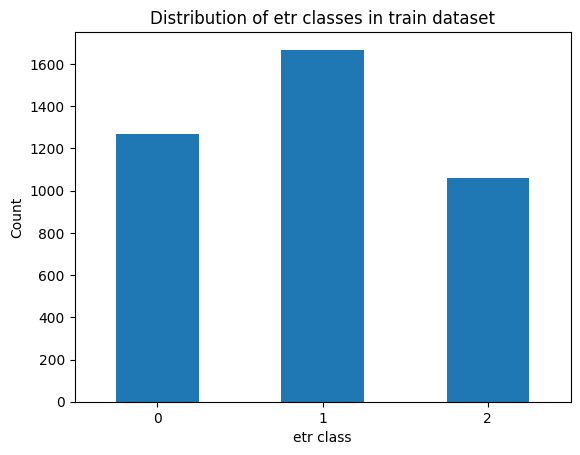

In [98]:
# Plot histogram of etr classes
class_counts_train.plot(kind='bar')
plt.title("Distribution of etr classes in train dataset")
plt.xlabel("etr class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

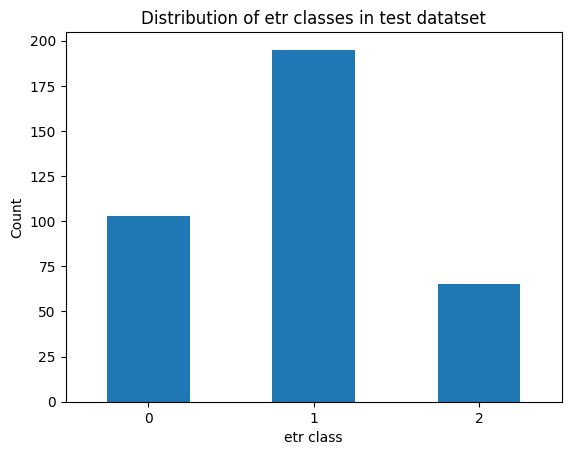

In [99]:
class_counts_test.plot(kind='bar')
plt.title("Distribution of etr classes in test datatset")
plt.xlabel("etr class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

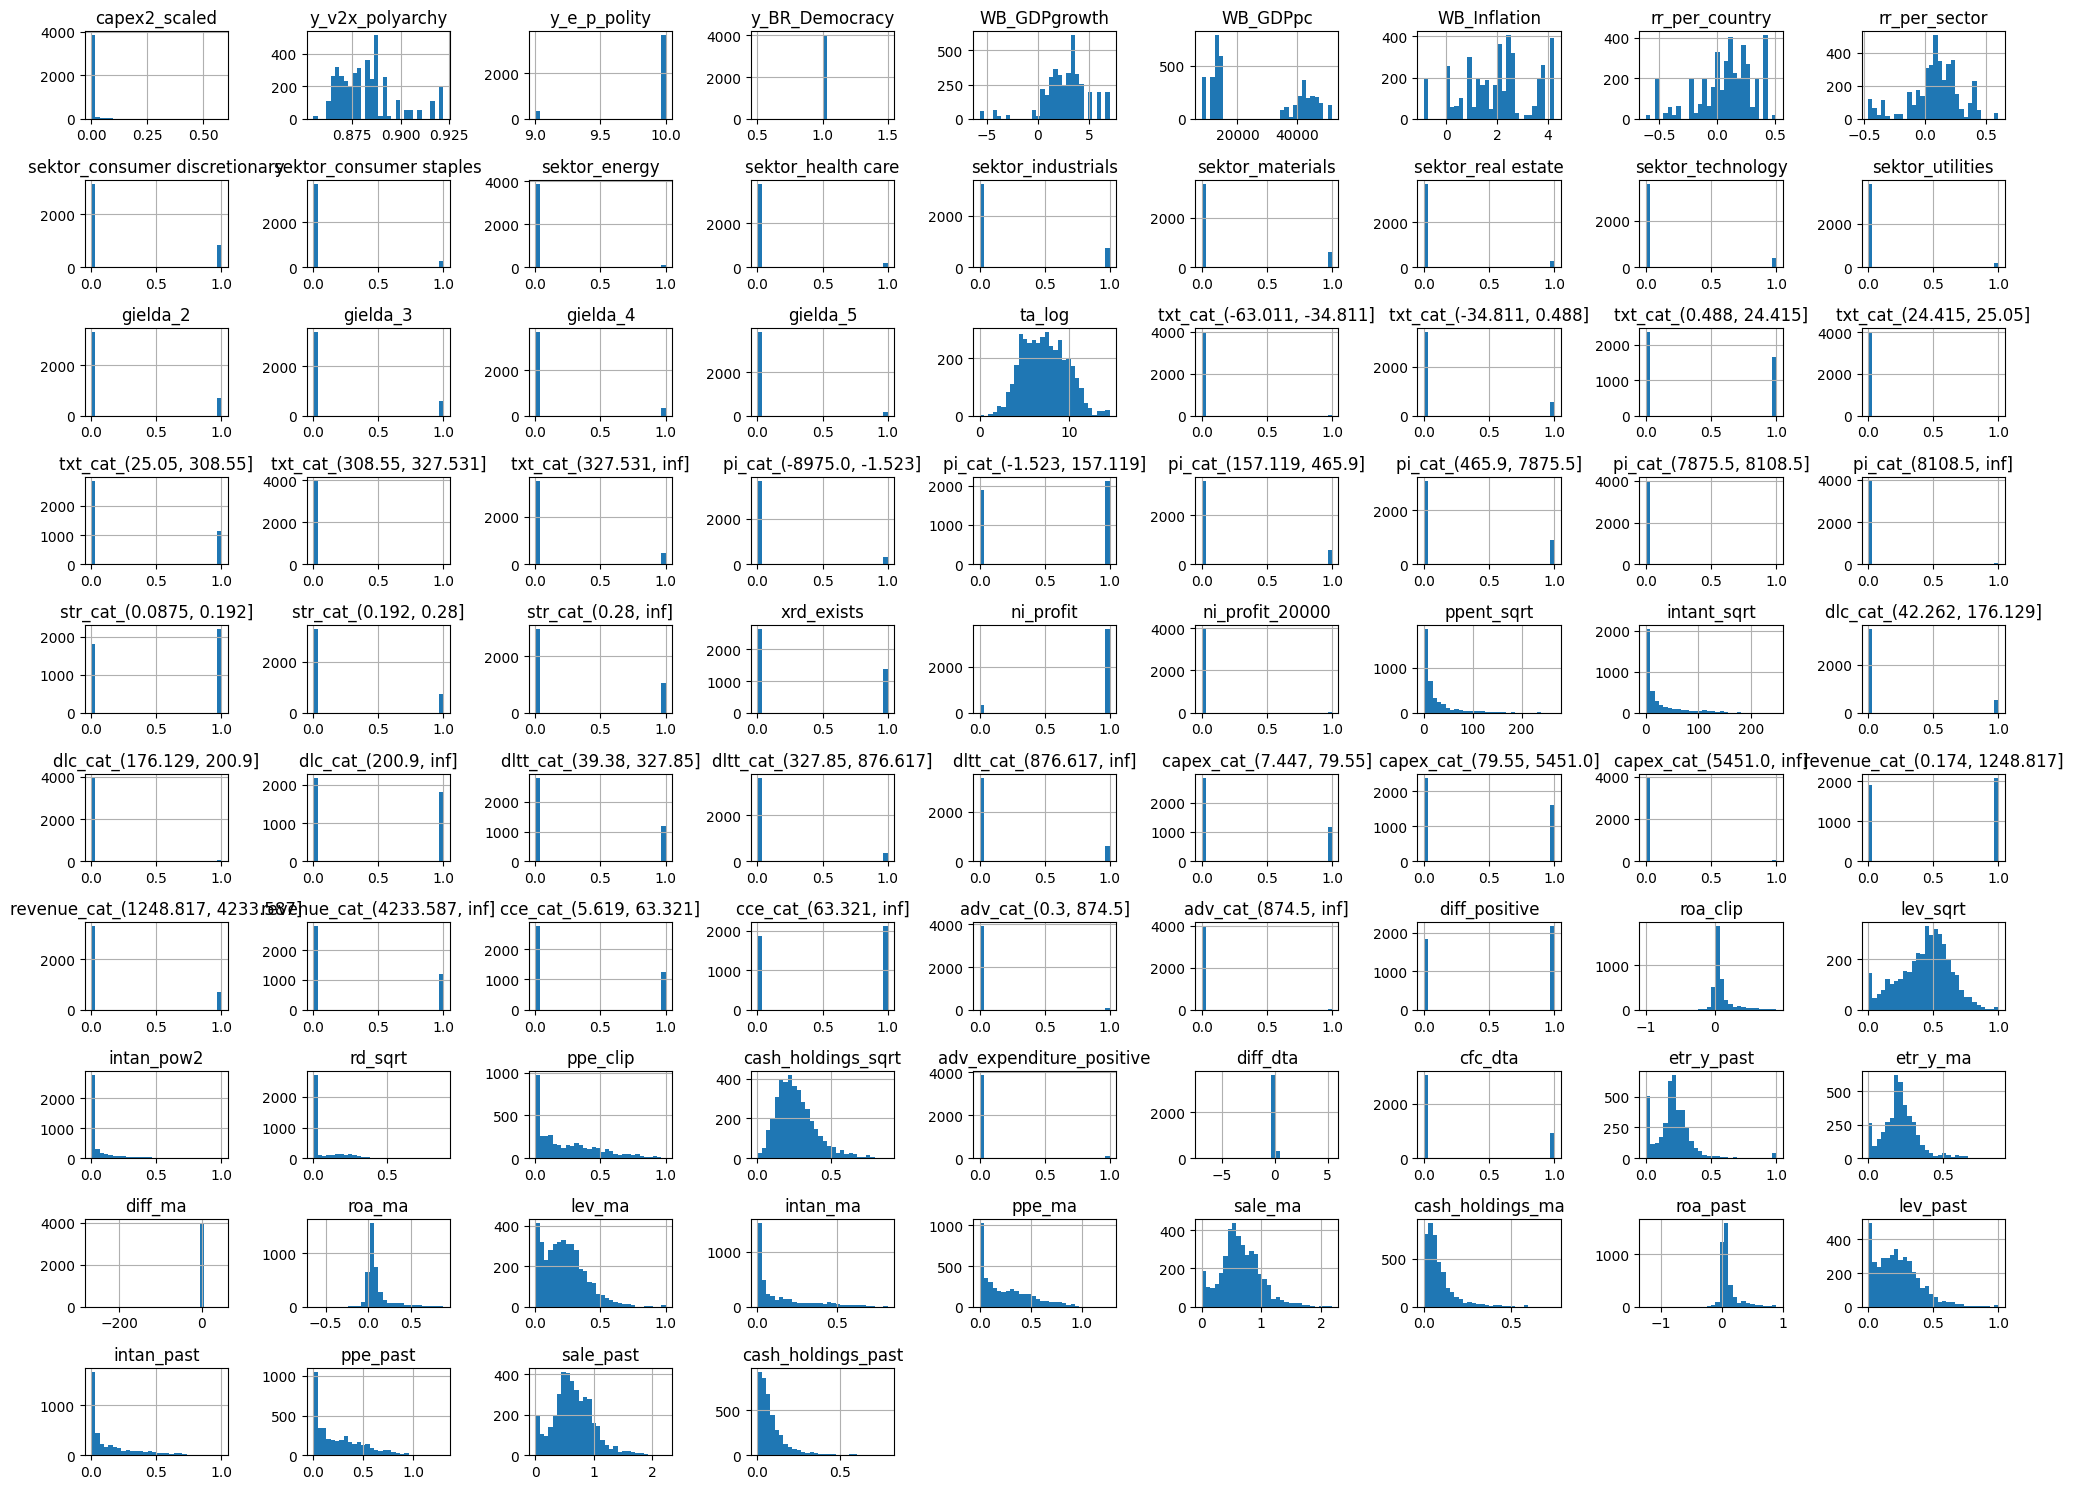

In [100]:
numeric_cols = new_train_df.select_dtypes(include='number').columns

new_train_df[numeric_cols].hist(figsize=(20, 15), bins=30)
plt.tight_layout()
plt.show()

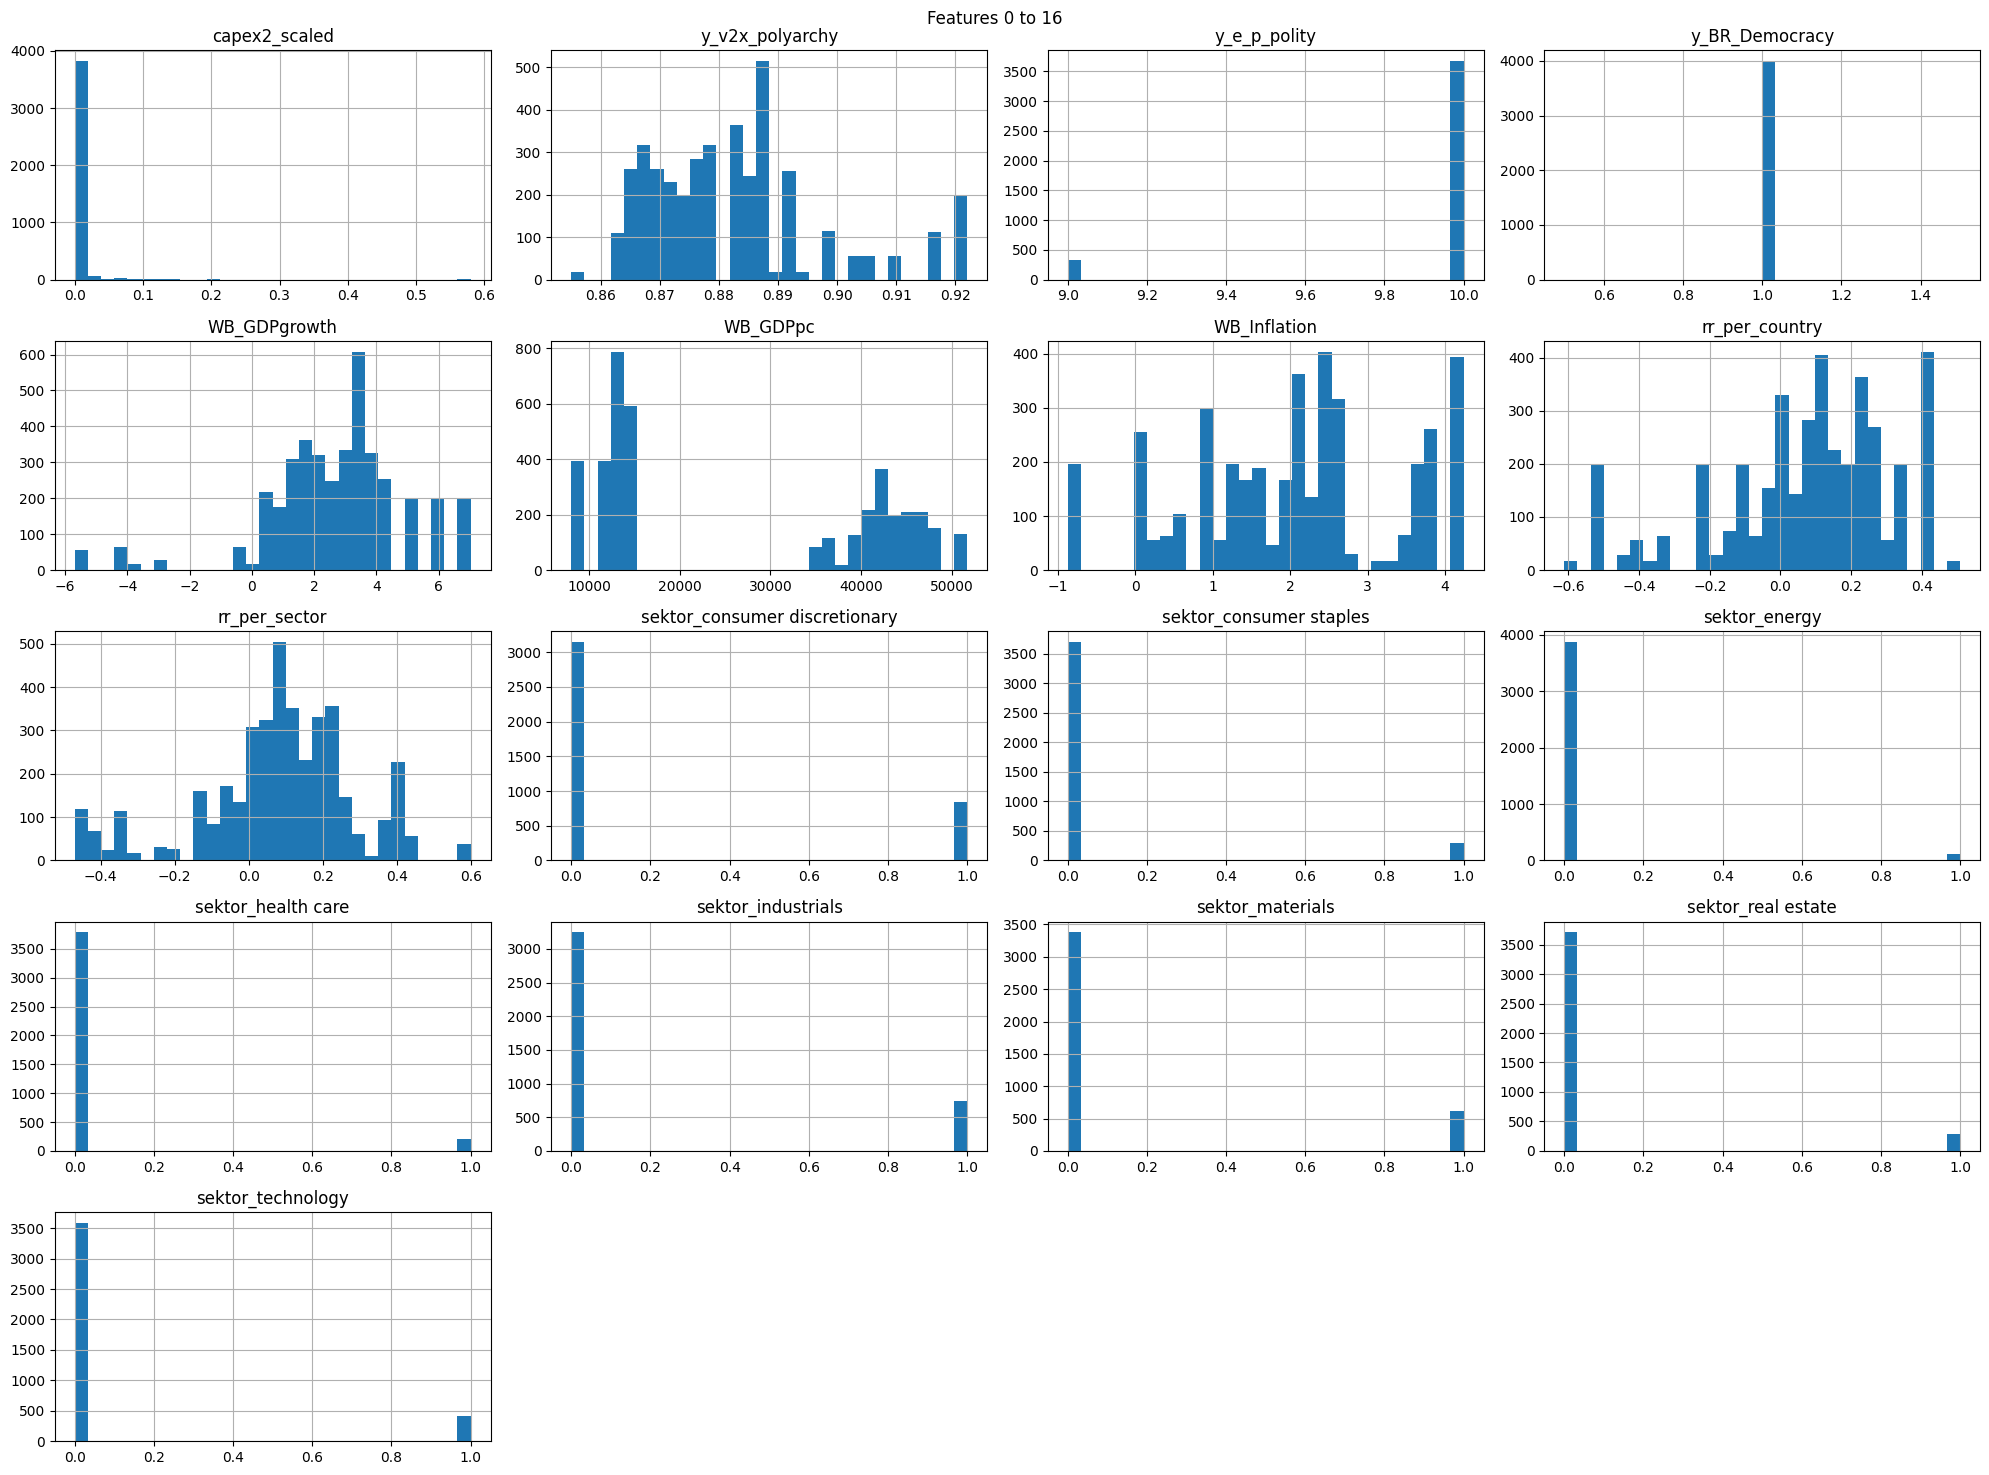

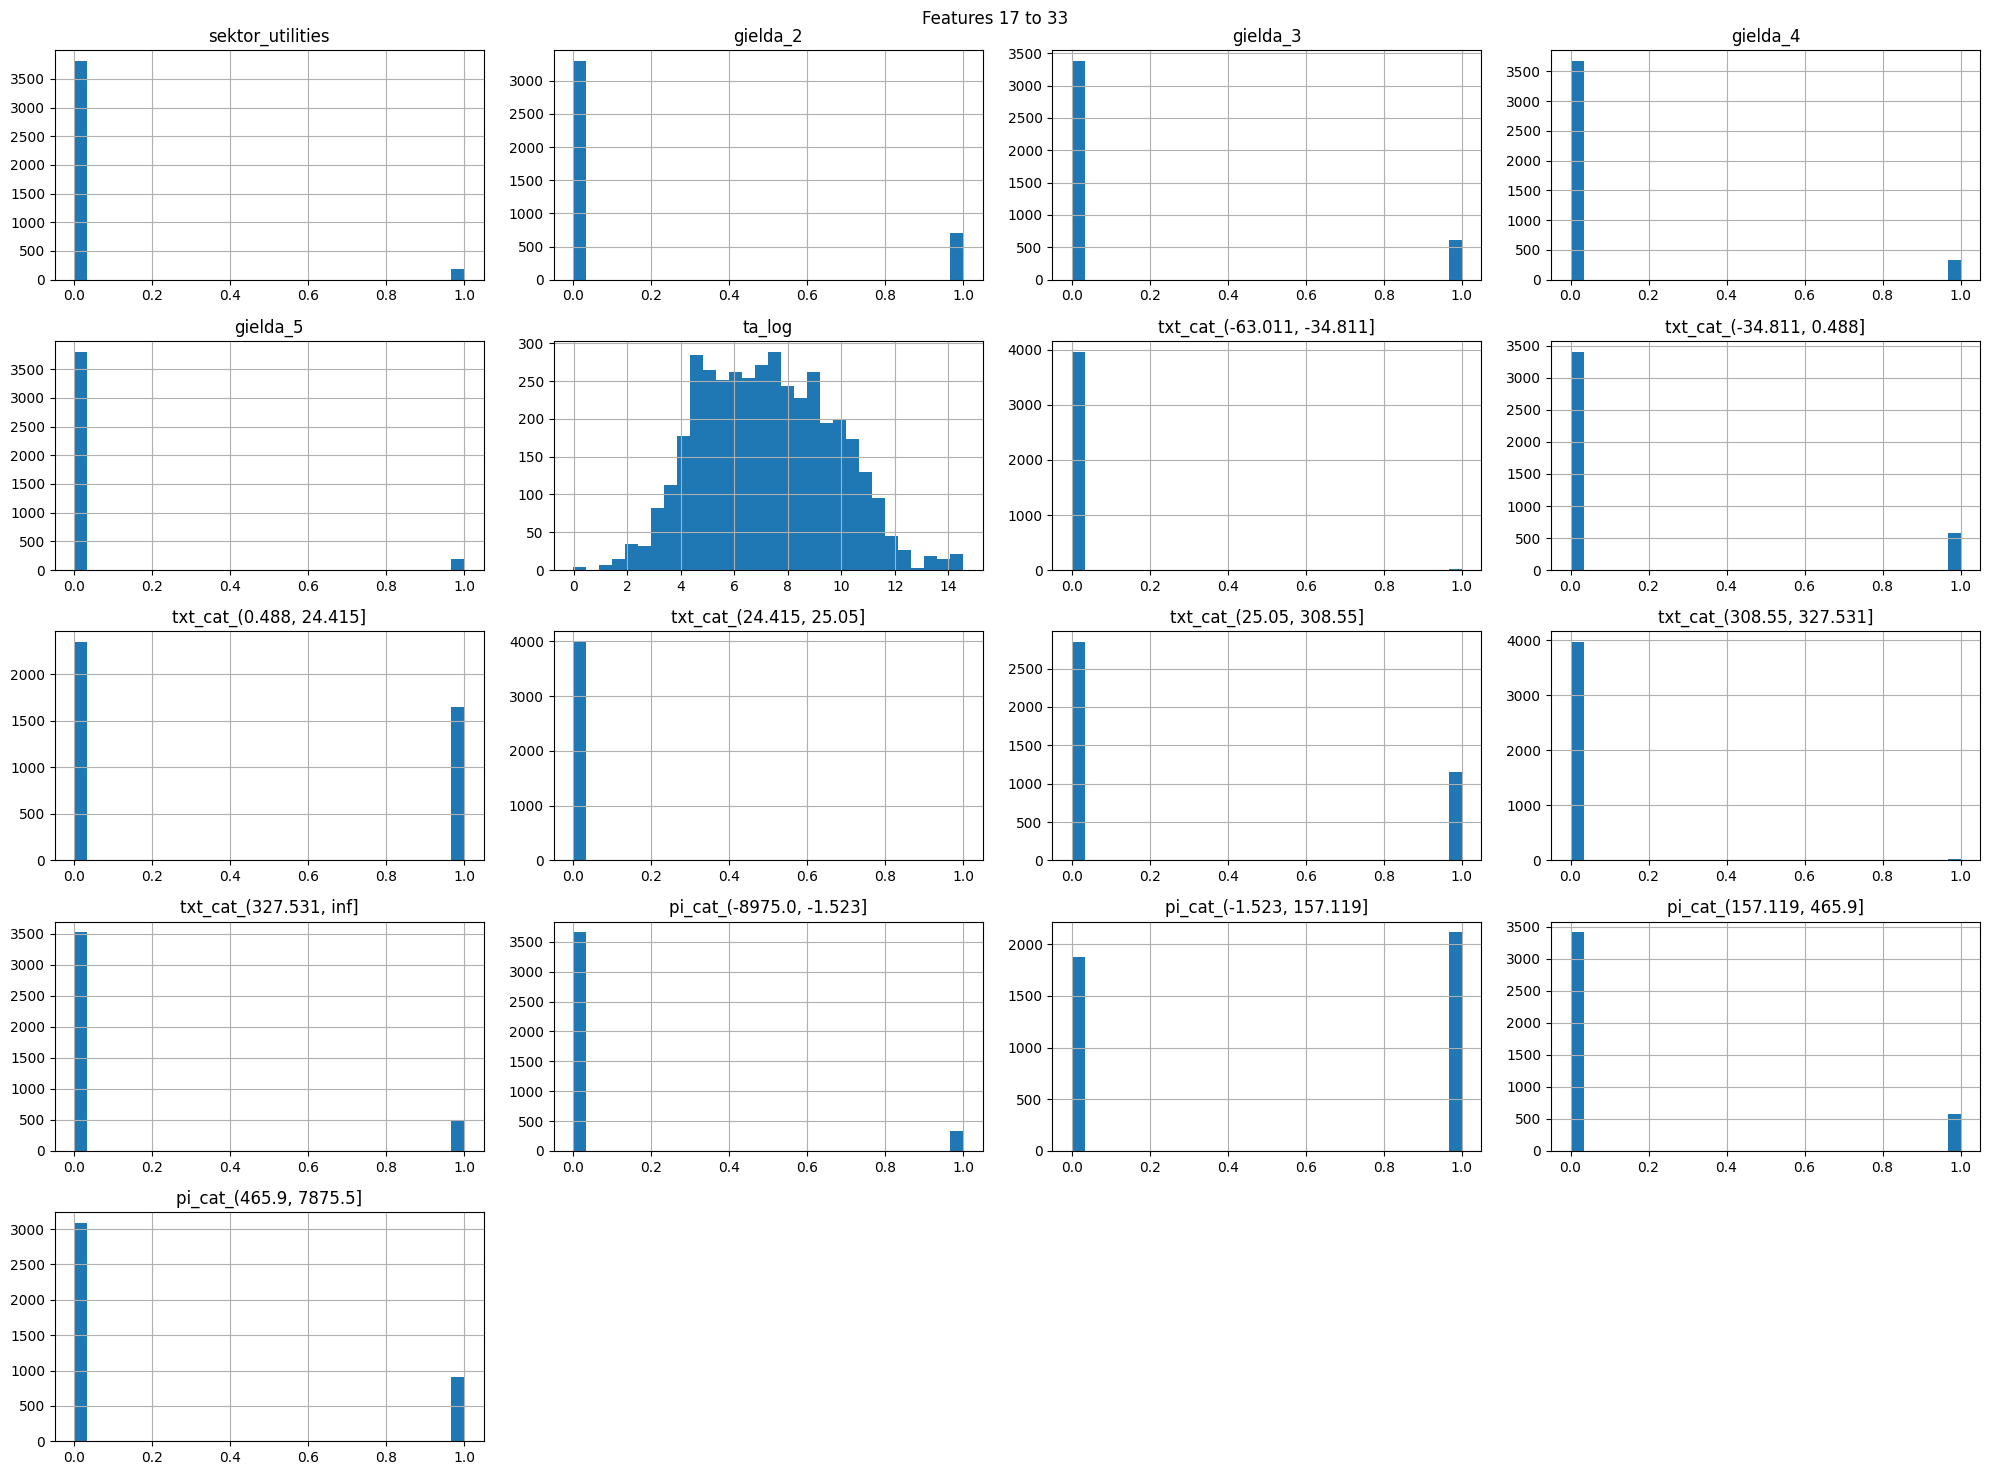

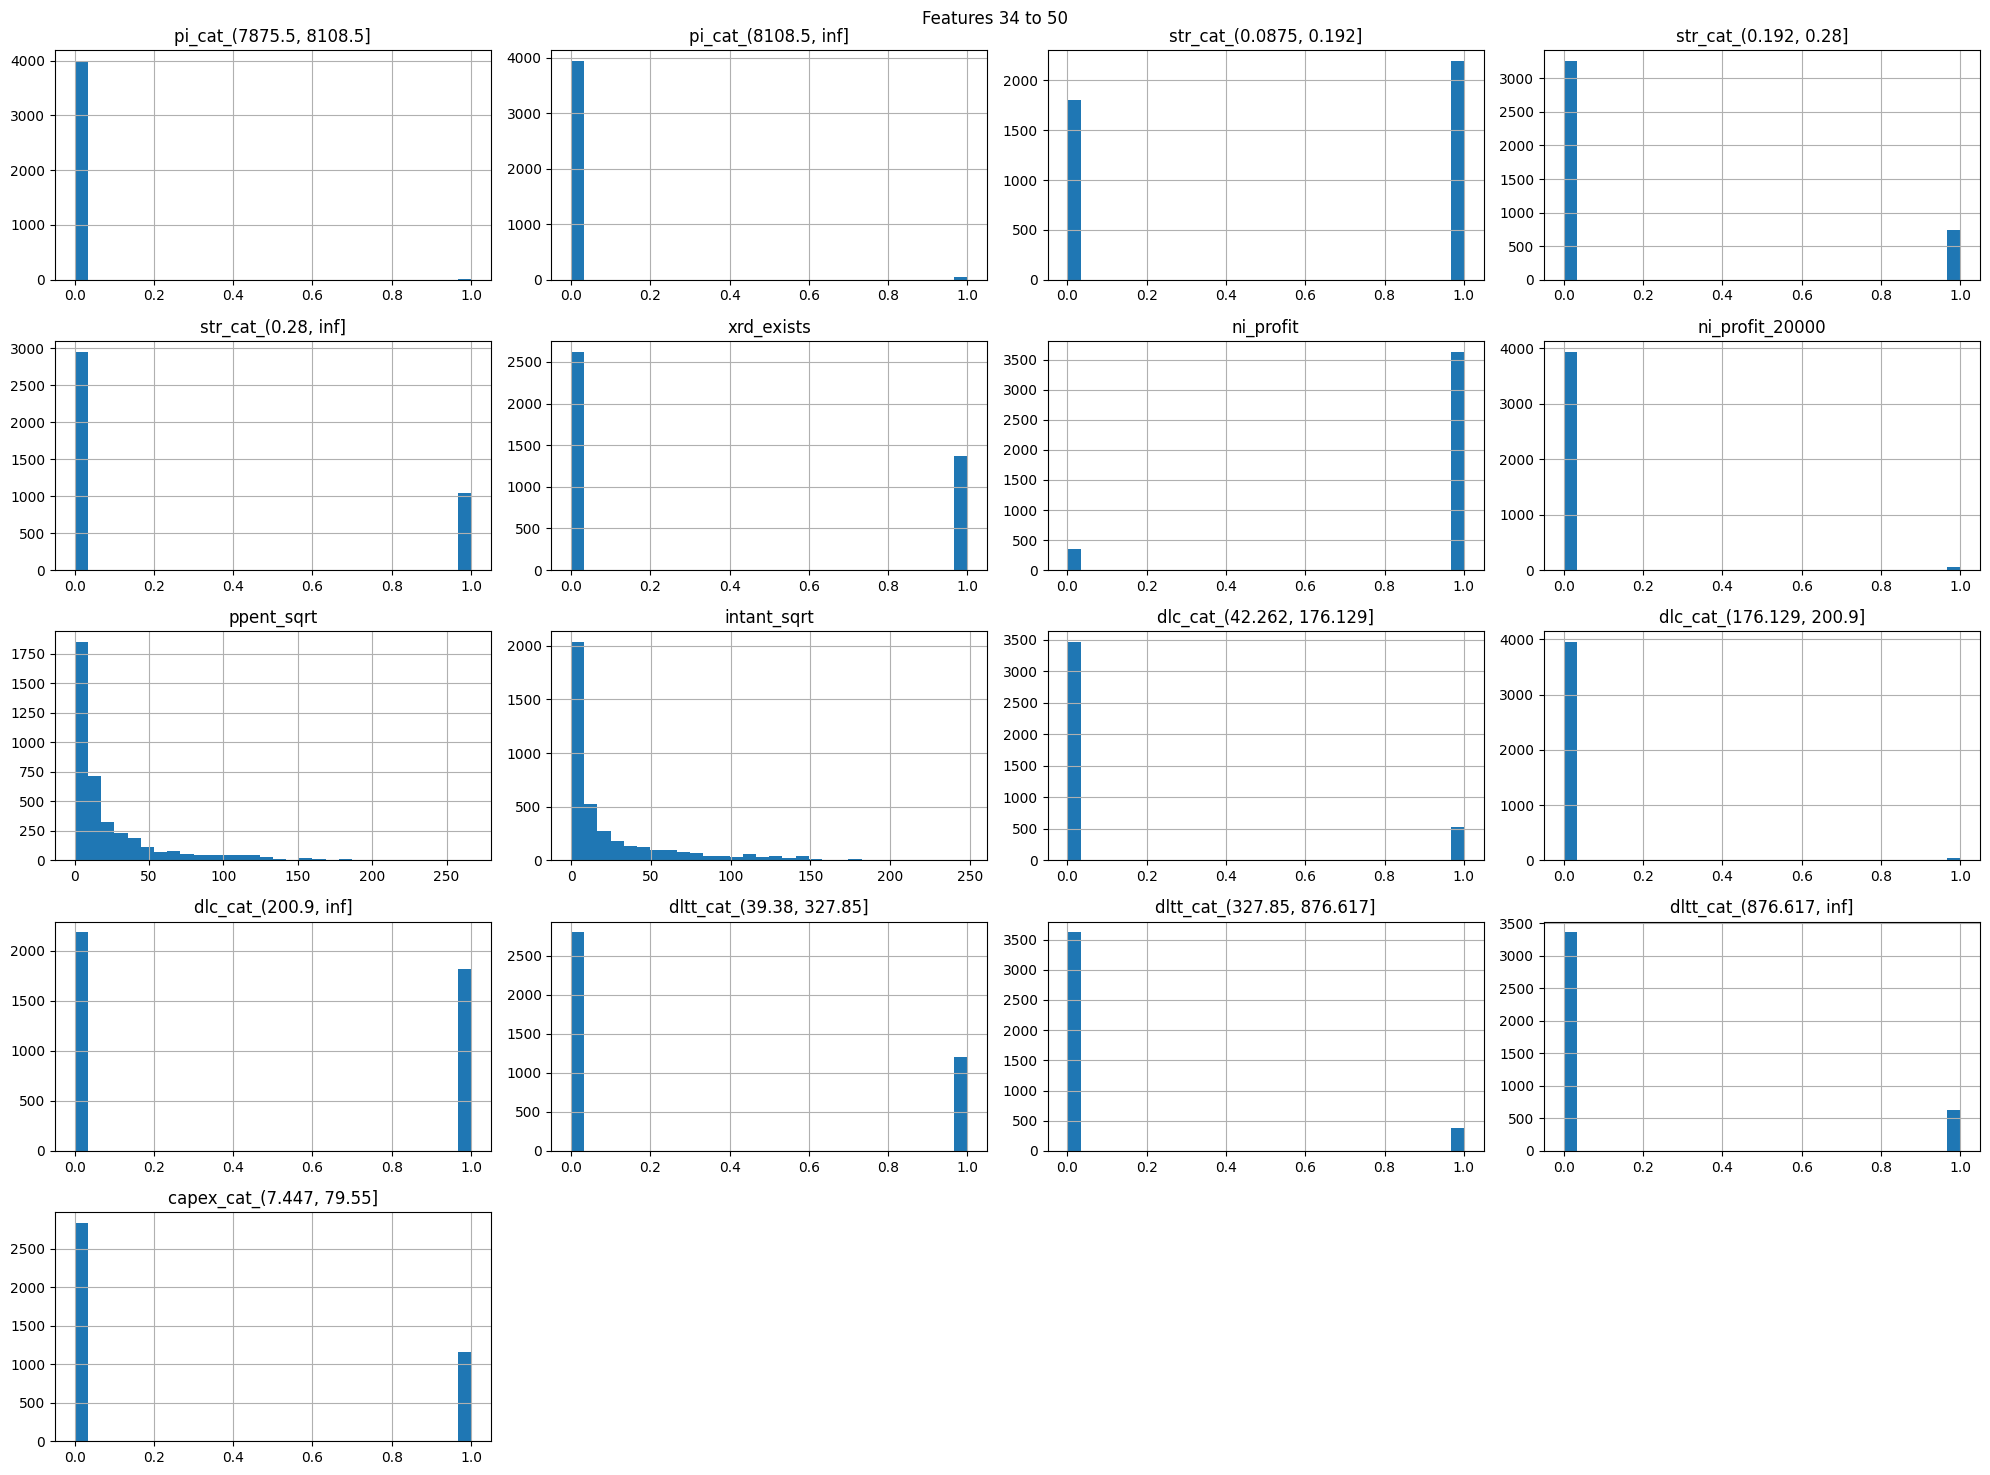

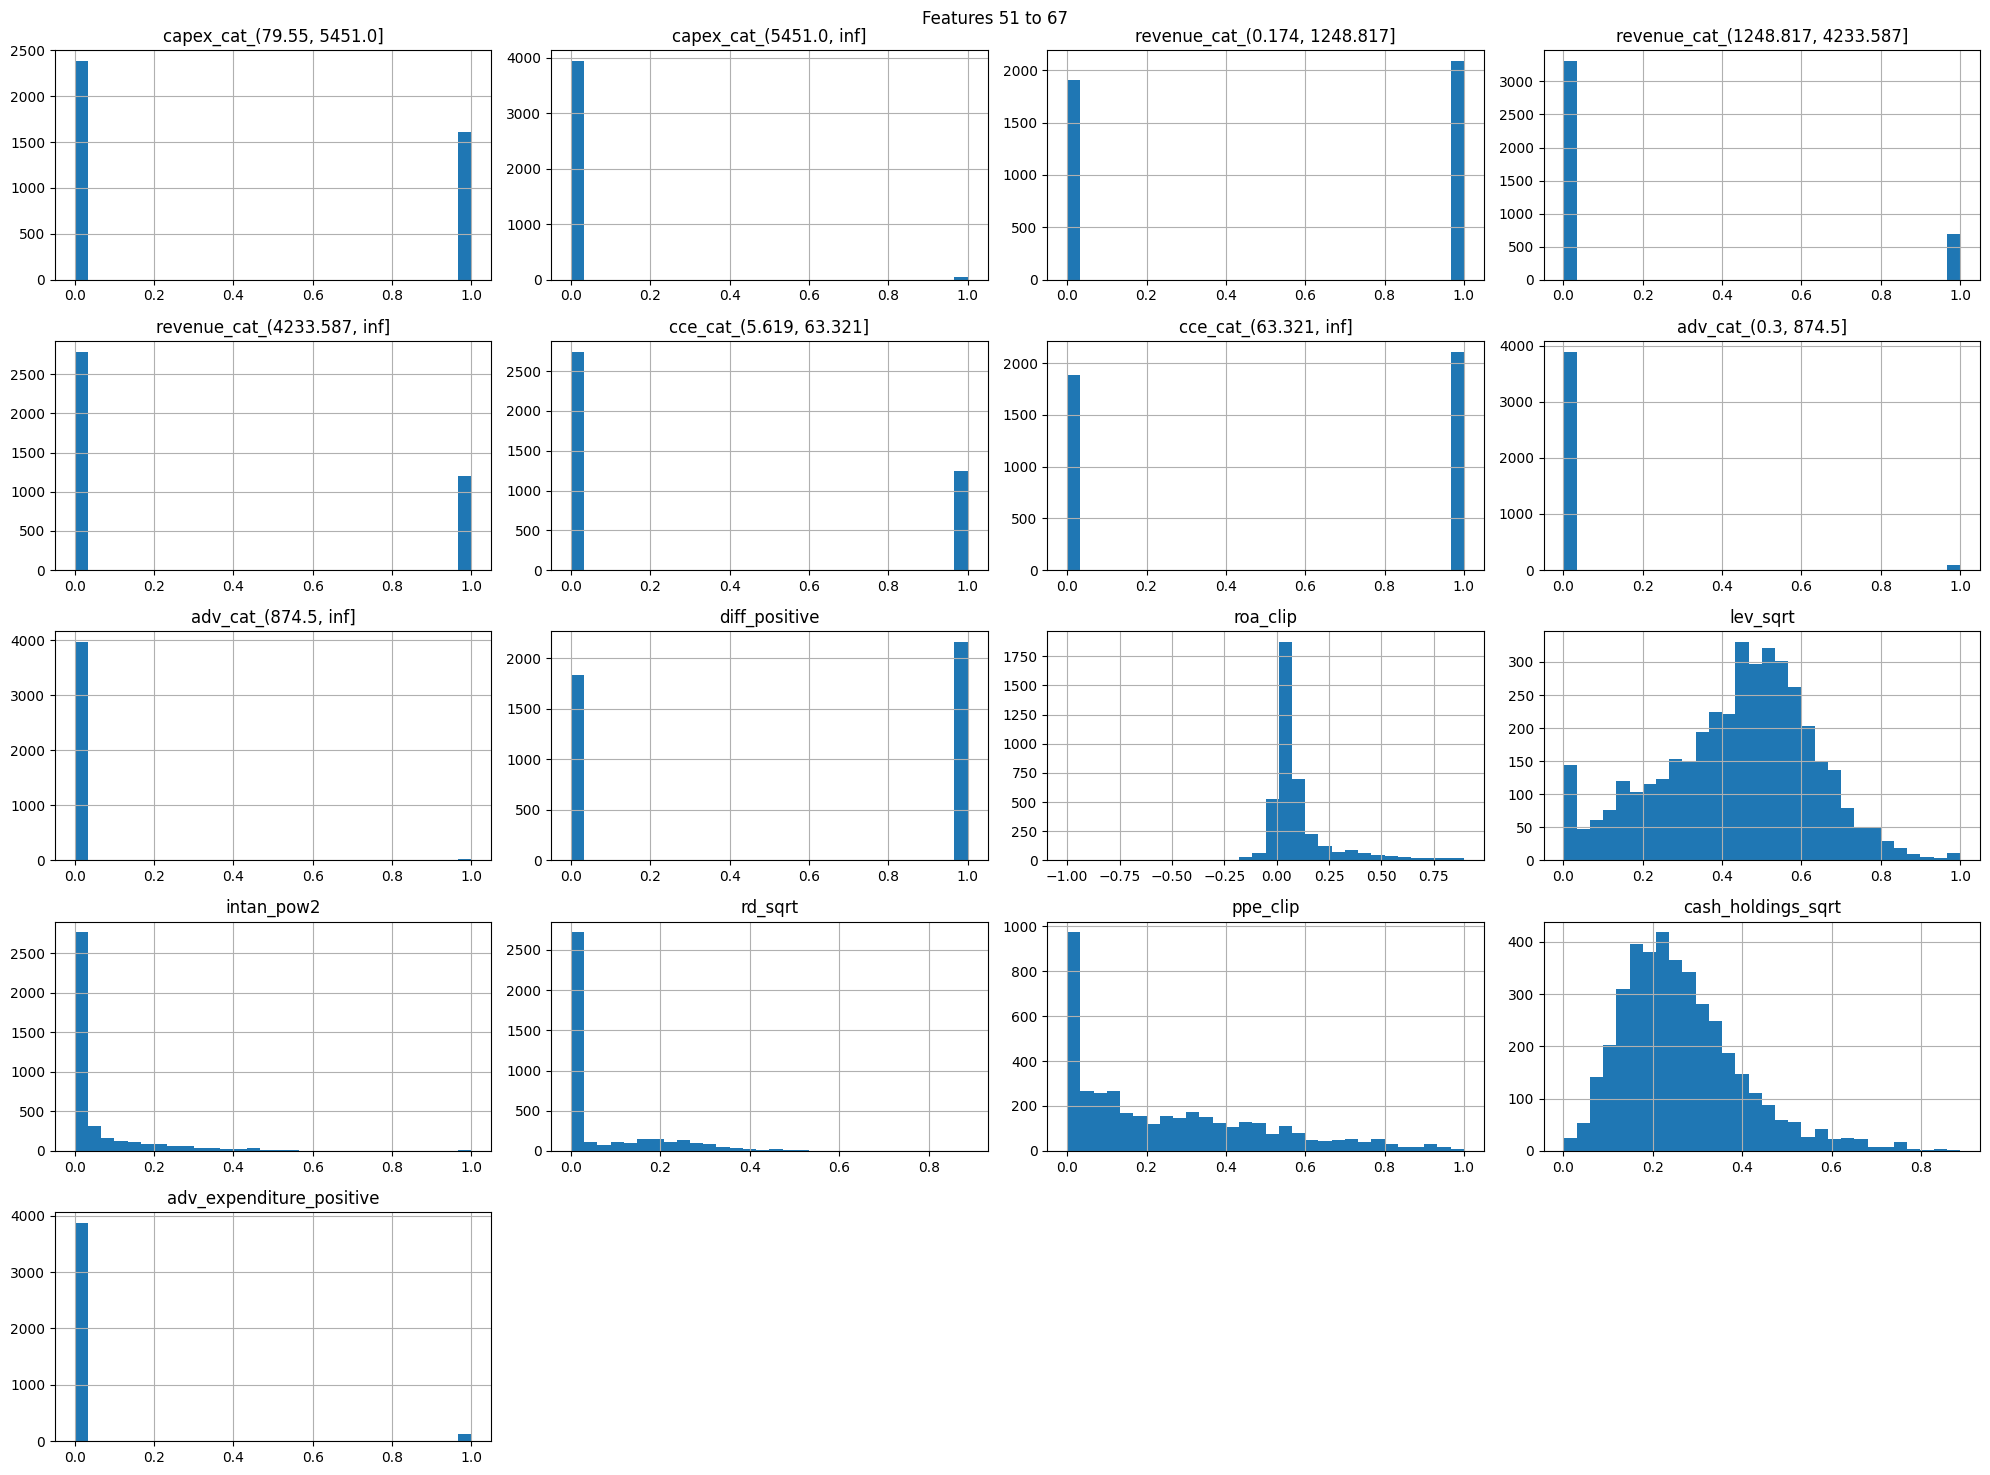

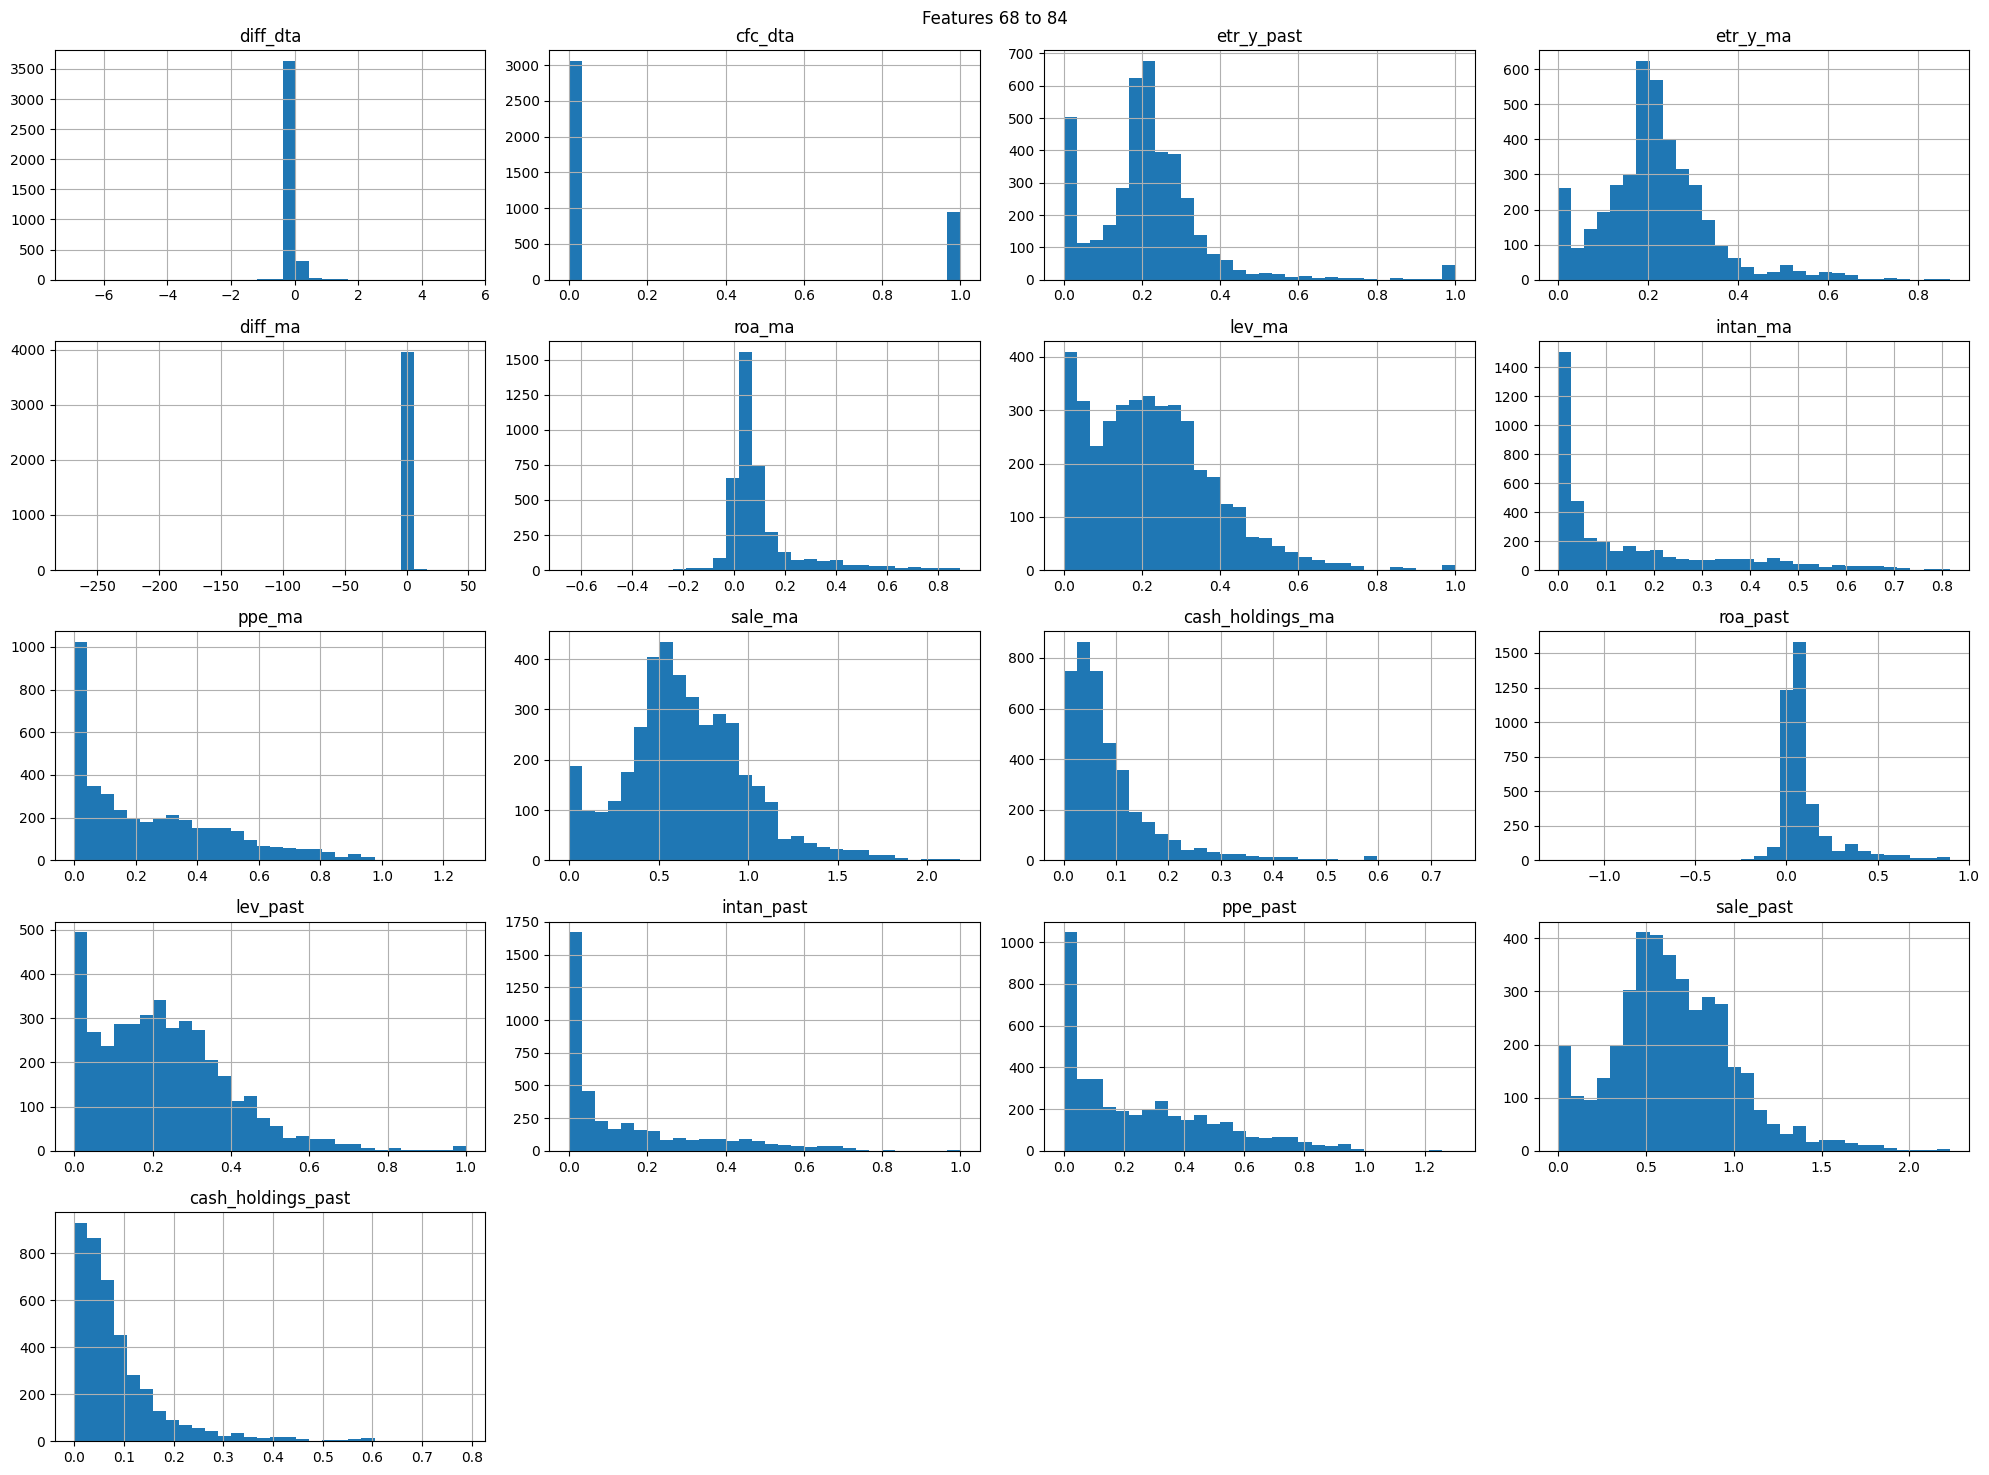

In [101]:
batch_size = 17
for i in range(0, len(numeric_cols), batch_size):
    new_train_df[numeric_cols[i:i+batch_size]].hist(figsize=(20, 15), bins=30)
    plt.suptitle(f"Features {i} to {i+batch_size-1}")
    plt.tight_layout()
    plt.show()

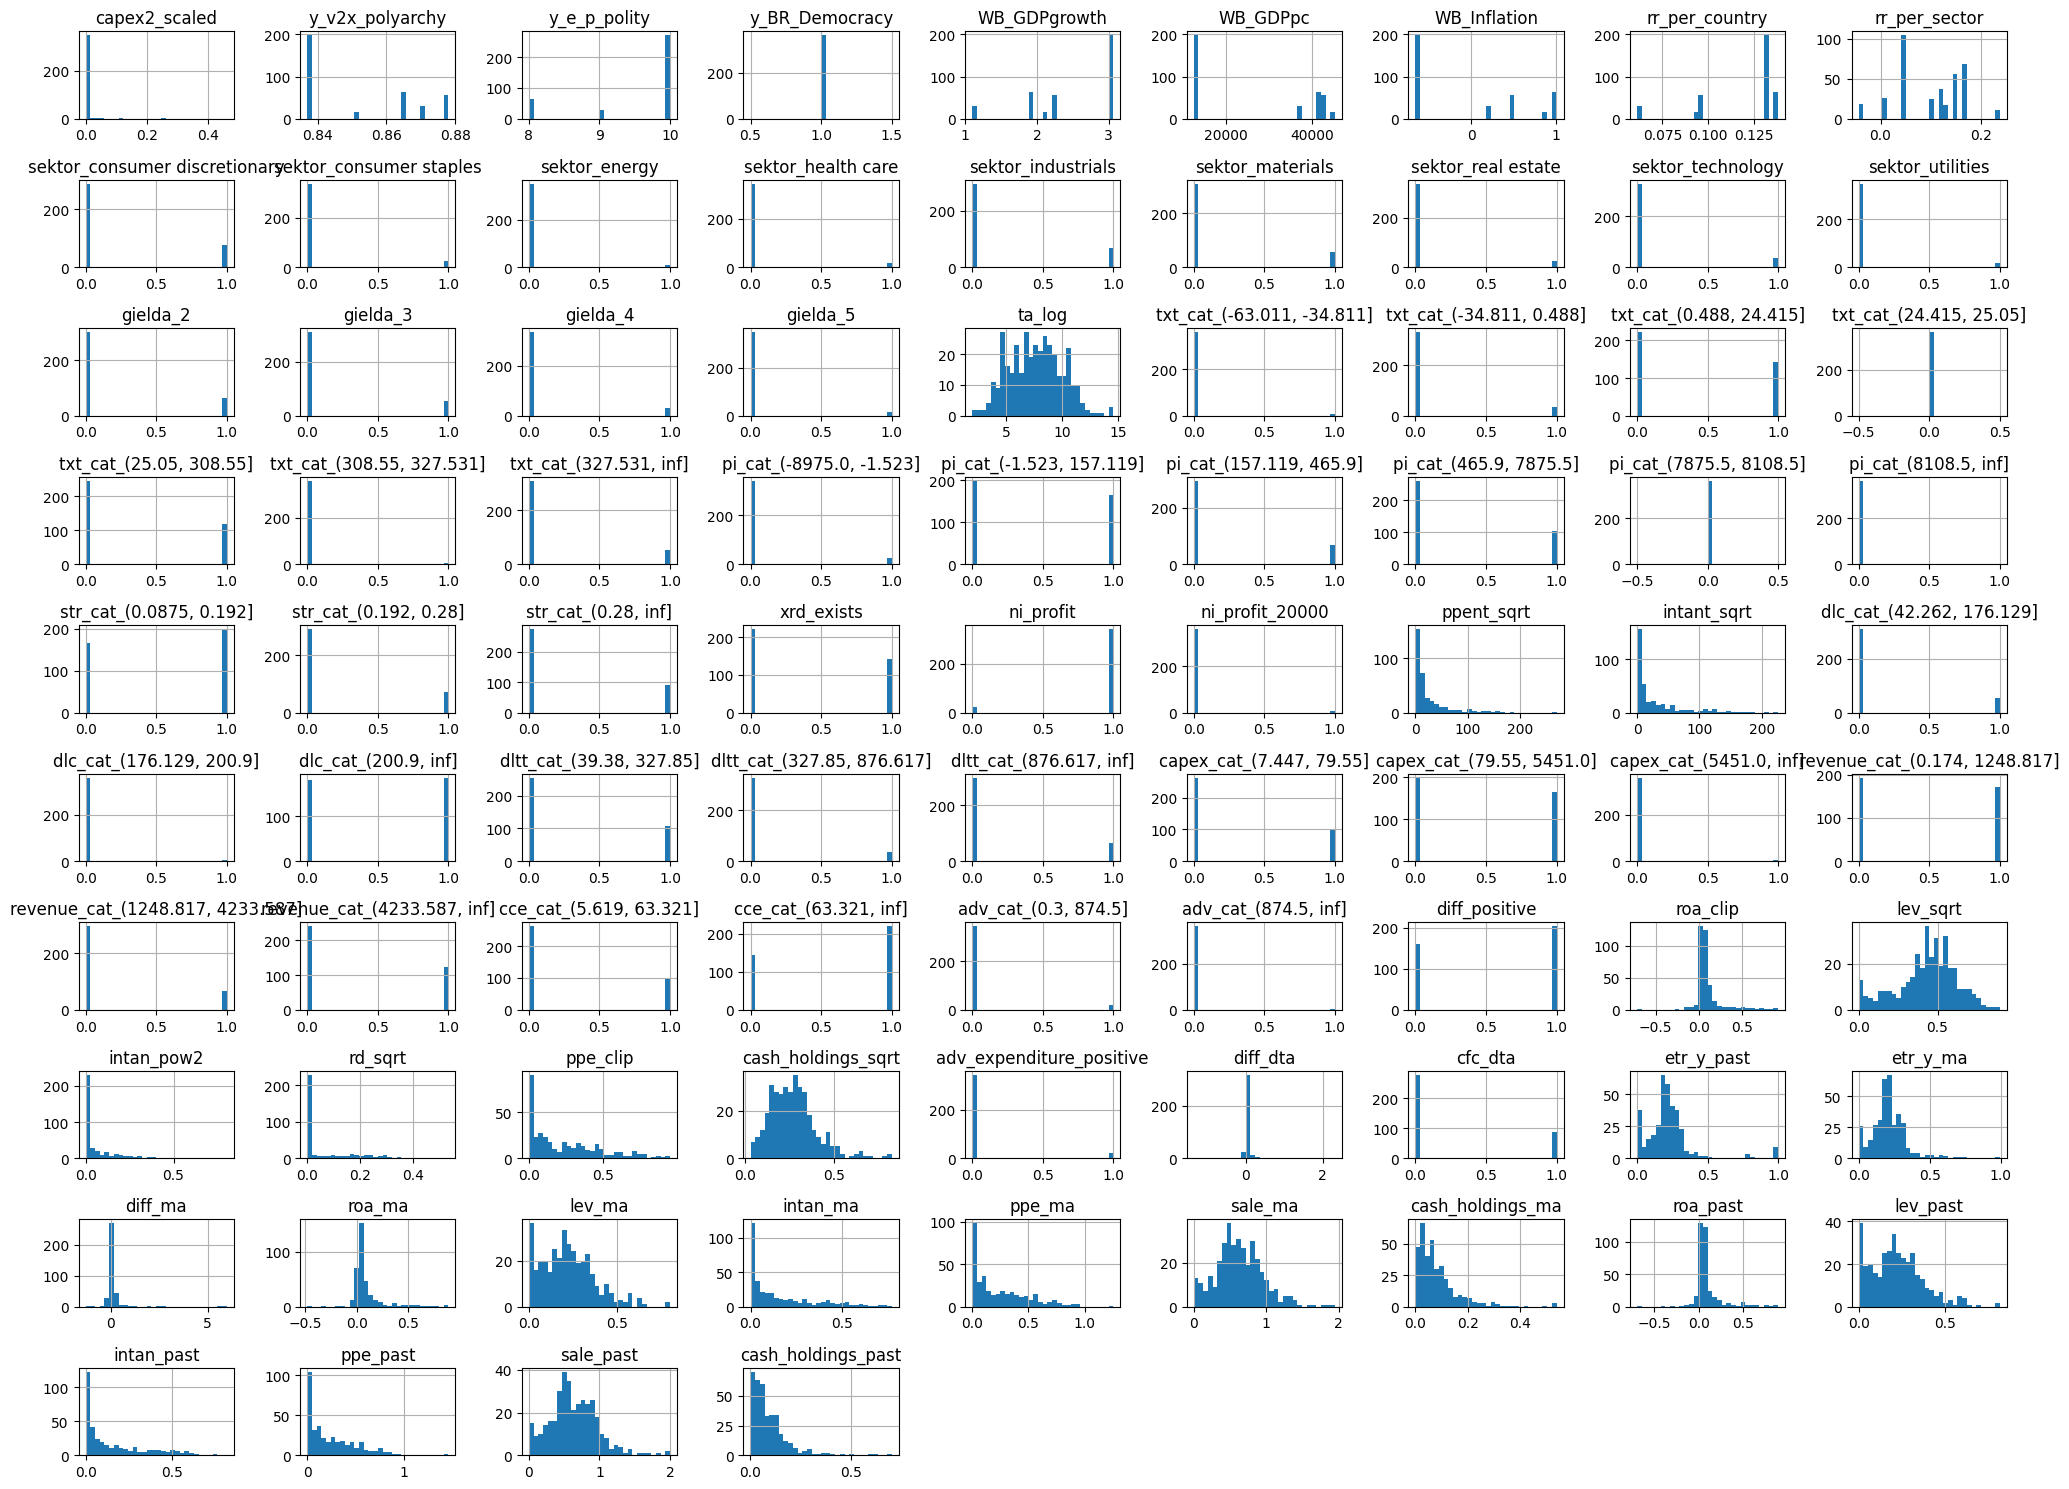

In [102]:
numeric_cols = new_test_df.select_dtypes(include='number').columns

new_test_df[numeric_cols].hist(figsize=(20, 15), bins=30)
plt.tight_layout()
plt.show()

**Part 2: Model Training**

In [103]:
# Features (X) and Target (y)
X_train = new_train_df                      # predictors
y_train = df_train['risk_level']            # target variable (3 classes: 0,1,2)
X_test = new_test_df
y_test = df_test['risk_level']

In [104]:
# Time-Series Cross Validation
tscv = TimeSeriesSplit(n_splits=5)


1. Logistic Regression

In [105]:
# Hyperparameter tuning
lr = LogisticRegression(max_iter=1000, multi_class='multinomial')
lr_param_grid = {
    'penalty' : ['l2','None'],
    'C': [0.001, 0.01, 0.1],
    'solver': ['newton-cg', 'lbfgs', 'saga', 'sag']
}

lr_grid_search = GridSearchCV(lr, lr_param_grid, cv=tscv, scoring='f1_macro', n_jobs=-1, verbose=1)
lr_grid_search.fit(X_train, y_train)

print("\nKNN Grid Search Results:")
print(f"Best parameters: {lr_grid_search.best_params_}")
print(f"Best cross-validation f1 score: {lr_grid_search.best_score_:.4f}")

best_lr = lr_grid_search.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits

KNN Grid Search Results:
Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
Best cross-validation f1 score: 0.5502


In [106]:
# Evaluate on training set using CV
scoring = {
    'f1_score': 'f1_macro',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'roc_auc_ovr': 'roc_auc_ovr',
}

lr_results = cross_validate(
    lr_grid_search.best_estimator_,
    X_train,
    y_train,
    cv=tscv,
    scoring=scoring,
    return_train_score=False
)

for metric, scores in lr_results.items():
    print(metric, "Mean:", round(scores.mean(), 4))

fit_time Mean: 3.0717
score_time Mean: 0.0198
test_f1_score Mean: 0.5502
test_precision Mean: 0.5696
test_recall Mean: 0.5516
test_roc_auc_ovr Mean: 0.7327


2. KNN


In [107]:
# Hyperparameter tuning

knn_param_grid = {
    'n_neighbors': range(3, 15),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=tscv, scoring='f1_macro')
knn_grid_search.fit(X_train, y_train)

print("\nKNN Grid Search Results:")
print(f"Best parameters: {knn_grid_search.best_params_}")
print(f"Best cross-validation f1 score: {knn_grid_search.best_score_:.4f}")

best_knn = knn_grid_search.best_estimator_


KNN Grid Search Results:
Best parameters: {'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}
Best cross-validation f1 score: 0.4871


In [108]:
# Evaluate on training set using CV
knn_results = cross_validate(
    knn_grid_search.best_estimator_,
    X_train,
    y_train,
    cv=tscv,
    scoring=scoring,
    return_train_score=False
)

for metric, scores in knn_results.items():
    print(metric, "Mean:", round(scores.mean(), 4))

fit_time Mean: 0.0056
score_time Mean: 0.2889
test_f1_score Mean: 0.4871
test_precision Mean: 0.507
test_recall Mean: 0.4997
test_roc_auc_ovr Mean: 0.6628


3. SVM

In [109]:
# Hyperparameter tuning
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

svc = LinearSVC(dual=False, max_iter=5000)
svm = CalibratedClassifierCV(svc)

svm_param_grid = {
    'estimator__C': [0.01, 0.1, 1, 10, 100, 1000]
}

svm_grid_search = GridSearchCV(svm, svm_param_grid, cv=tscv, scoring='f1_macro', n_jobs=-1, verbose=1)
svm_grid_search.fit(X_train, y_train)

print("\nLinear SVM Random Search Results:")
print(f"Best parameters: {svm_grid_search.best_params_}")
print(f"Best cross-validation f1 score: {svm_grid_search.best_score_:.4f}")


Fitting 5 folds for each of 6 candidates, totalling 30 fits

Linear SVM Random Search Results:
Best parameters: {'estimator__C': 1}
Best cross-validation f1 score: 0.4339


In [110]:
# Evaluate on training set using CV
svm_results = cross_validate(
    svm_grid_search.best_estimator_,
    X_train,
    y_train,
    cv=tscv,
    scoring=scoring,
    return_train_score=False
)

for metric, scores in svm_results.items():
    print(metric, "Mean:", round(scores.mean(), 4))

fit_time Mean: 0.7641
score_time Mean: 0.1226
test_f1_score Mean: 0.4339
test_precision Mean: 0.4904
test_recall Mean: 0.4898
test_roc_auc_ovr Mean: 0.698


In [111]:
svm_rbf = SVC(kernel='rbf', decision_function_shape='ovr', probability=True)

param_svm_rbf = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001]
}

svm_rbf_search = GridSearchCV(
    svm_rbf,
    param_svm_rbf,
    cv=tscv,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1,
)
svm_rbf_search.fit(X_train, y_train)

print("\nRBF SVM Random Search Results:")
print(f"Best RBF SVM Params: {svm_rbf_search.best_params_}")
print(f"Best RBF SVM f1 Score: {svm_rbf_search.best_score_:.4f}")

Fitting 5 folds for each of 25 candidates, totalling 125 fits

RBF SVM Random Search Results:
Best RBF SVM Params: {'C': 100, 'gamma': 0.001}
Best RBF SVM f1 Score: 0.4786


In [112]:
# Evaluate on training set using CV
svm_rbf_results = cross_validate(
    svm_rbf_search.best_estimator_,
    X_train,
    y_train,
    cv=tscv,
    scoring=scoring,
    return_train_score=False
)

for metric, scores in svm_rbf_results.items():
    print(metric, "Mean:", round(scores.mean(), 4))

fit_time Mean: 4.8339
score_time Mean: 0.4288
test_f1_score Mean: 0.4786
test_precision Mean: 0.49
test_recall Mean: 0.4816
test_roc_auc_ovr Mean: 0.6498


In [125]:
# Define best model
best_svm = svm_grid_search.best_estimator_
best_svm_rbf = svm_rbf_search.best_estimator_

3. Final Evaluation

* Accuracy
* Precision, Recall, F1-Score (for each class)
* Confusion Matrix

In [143]:
def summarize_cv(cv_results, model_name):
    """Convert cross_validate results to a dictionary with mean scores."""
    return {
        'Model': model_name,
        **{metric: cv_results[f'test_{metric}'].mean() for metric in scoring}
    }

# Summarize each model
knn_summary = summarize_cv(knn_results, 'KNN')
lr_summary = summarize_cv(lr_results, 'Logistic Regression')
svm_summary = summarize_cv(svm_results, 'SVM')
svm_rbf_summary = summarize_cv(svm_rbf_results, 'RBF SVM')

# Combine them
all_summaries = [knn_summary, lr_summary, svm_summary, svm_rbf_summary]
cv_df = pd.DataFrame(all_summaries).round(4)
cv_df.set_index('Model', inplace=True)
print(cv_df)


                     f1_score  precision  recall  roc_auc_ovr
Model                                                        
KNN                    0.4871     0.5070  0.4997       0.6628
Logistic Regression    0.5502     0.5696  0.5516       0.7327
SVM                    0.4339     0.4904  0.4898       0.6980
RBF SVM                0.4786     0.4900  0.4816       0.6498


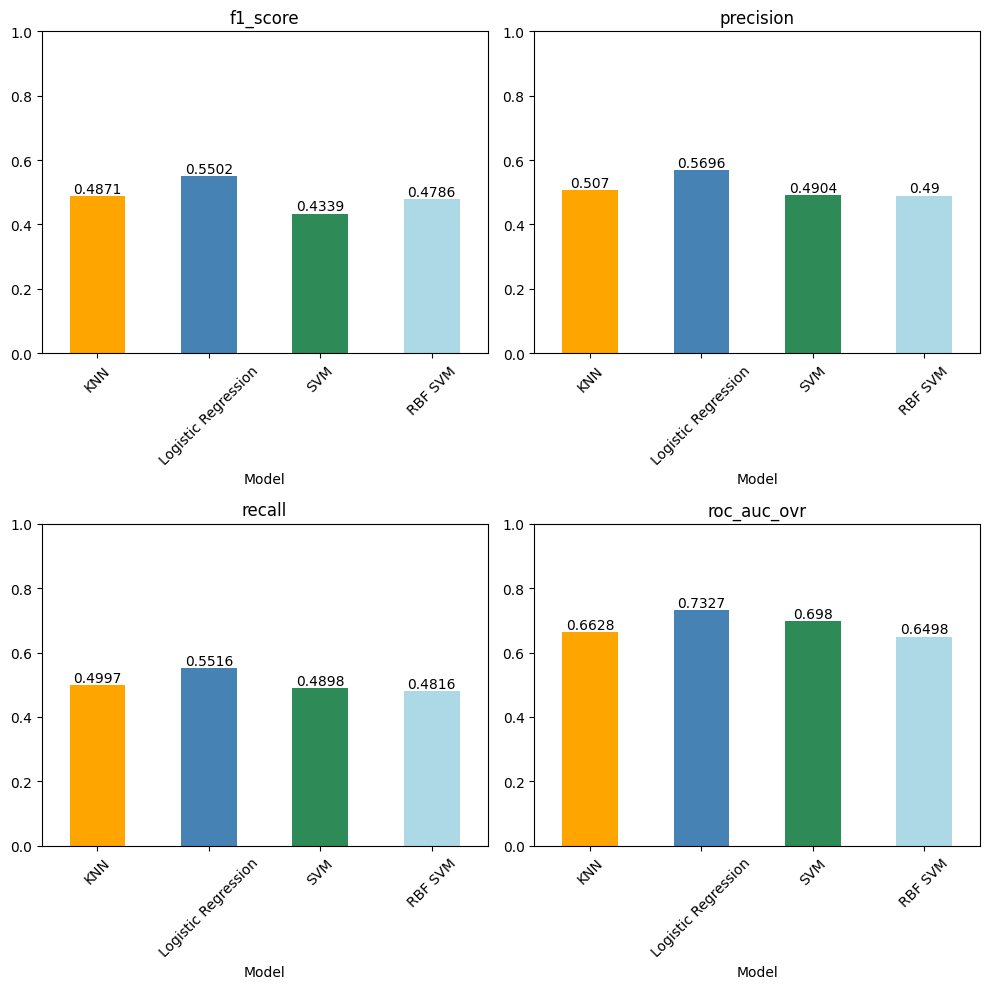

In [149]:
# Visualize metrics
metrics = cv_df.columns
model_colors = {
    'Logistic Regression': 'steelblue',
    'KNN': 'orange',
    'SVM': 'seagreen',
    'RBF SVM': 'lightblue',
}

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()
for i, metric in enumerate(metrics):
    ax = axes[i]
    colors = [model_colors[model] for model in cv_df.index]
    cv_df[metric].plot(kind='bar', ax=ax, color=colors)
    ax.set_title(metric)
    ax.set_ylim(0, 1)
    for j, v in enumerate(cv_df[metric]):
        ax.text(j, v + 0.01, str(v), ha='center')
        ax.set_xticklabels(cv_df.index, rotation=45)

plt.tight_layout()
plt.show()

The Logistic Regression model is the best model based on validation performance. KNN model has a better performance than SVM. The performance of SVM and RBF SVM is not much different.

In [129]:
# Create dictionary of best models
models = {
    'Logistic Regression': best_lr,
    'KNN': best_knn,
    'SVM': best_svm,
    'rbf_SVM': best_svm_rbf,
}
# Compare models on test set
results = {}

for name, model in models.items():
    # Make predictions on test set
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    print(f"\n{name} Final Test Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


Logistic Regression Final Test Results:
Accuracy: 0.6033

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.62      0.56       103
           1       0.70      0.67      0.69       195
           2       0.46      0.37      0.41        65

    accuracy                           0.60       363
   macro avg       0.56      0.55      0.55       363
weighted avg       0.61      0.60      0.60       363


KNN Final Test Results:
Accuracy: 0.4490

Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.34      0.32       103
           1       0.58      0.57      0.57       195
           2       0.30      0.26      0.28        65

    accuracy                           0.45       363
   macro avg       0.40      0.39      0.39       363
weighted avg       0.45      0.45      0.45       363


SVM Final Test Results:
Accuracy: 0.5510

Classification Report:
              precision 

In [130]:
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df = results_df.round(4)
results_df


,0
Logistic Regression,0.6033
KNN,0.4490
SVM,0.5510
rbf_SVM,0.2837


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'SVM'),
  Text(3, 0, 'rbf_SVM')])

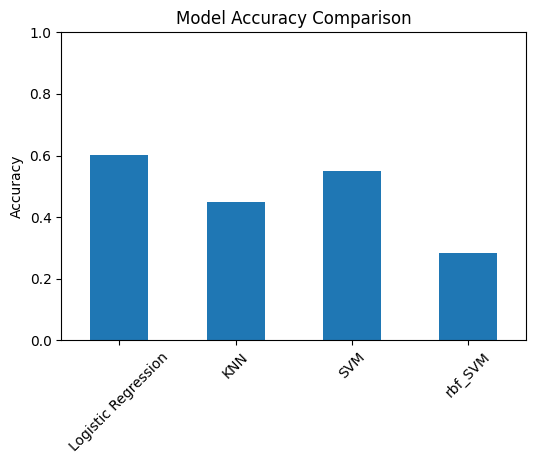

In [131]:
results_df = results_df.rename(columns={results_df.columns[0]: 'accuracy'})

plt.figure(figsize=(6,4))
results_df['accuracy'].plot(kind='bar')

plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)


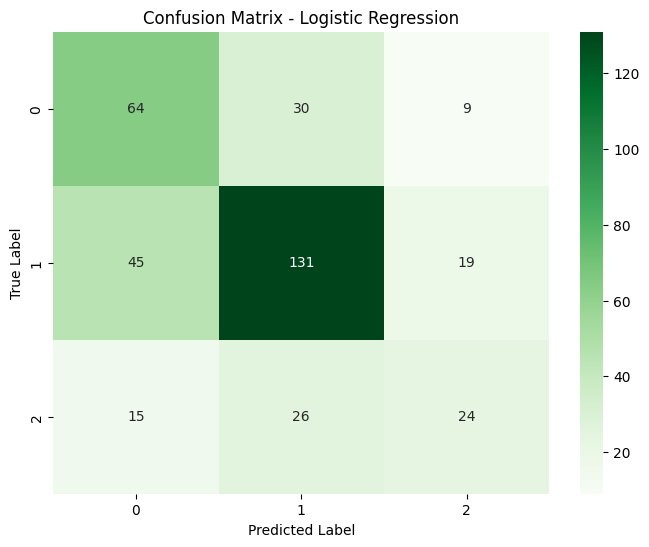

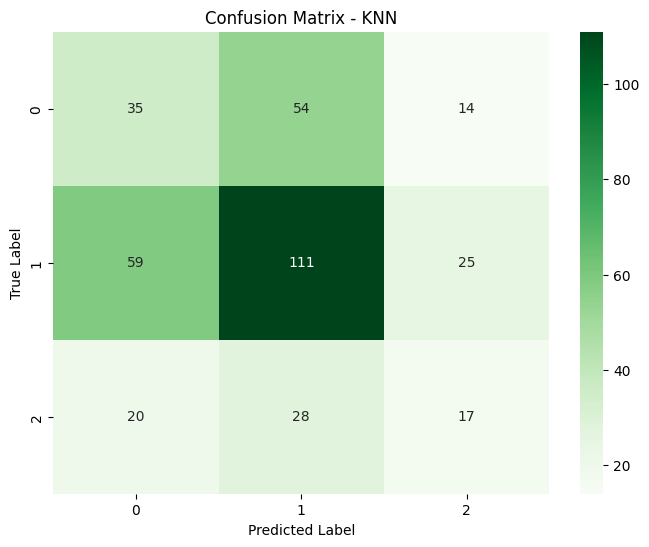

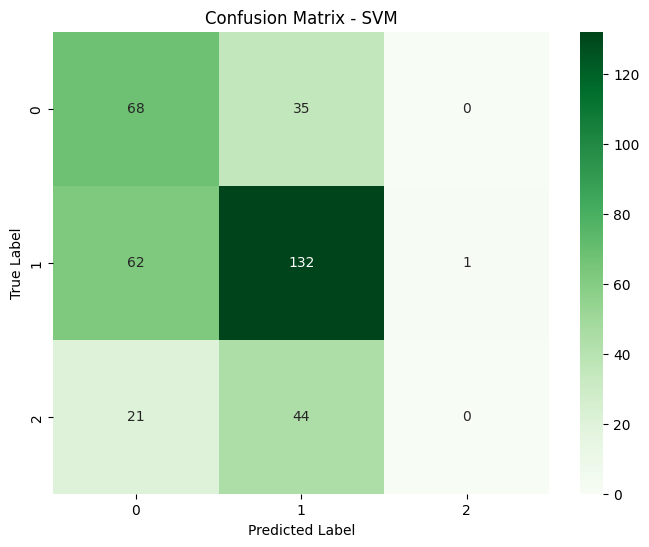

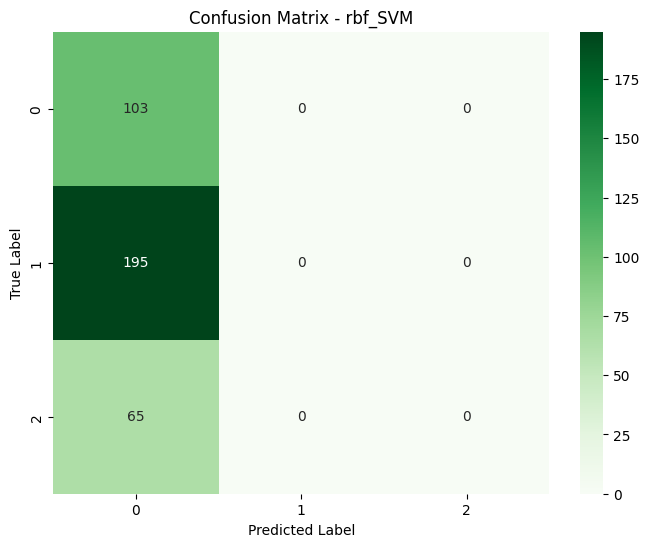

In [132]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

for name, model in models.items():
    y_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, f'Confusion Matrix - {name}')

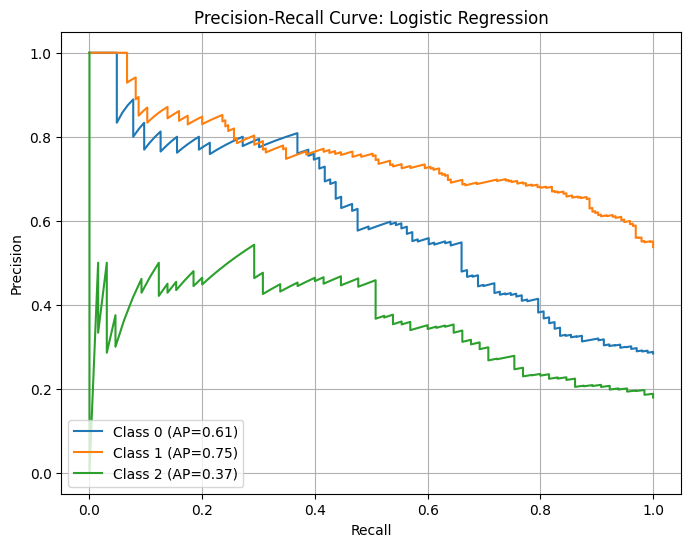

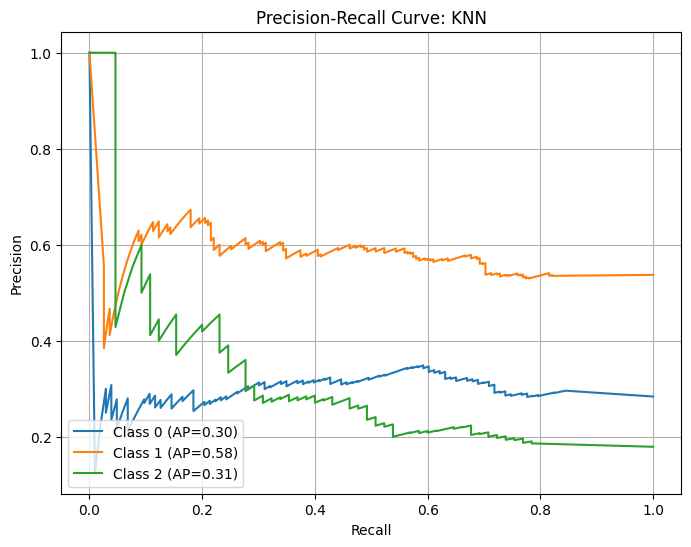

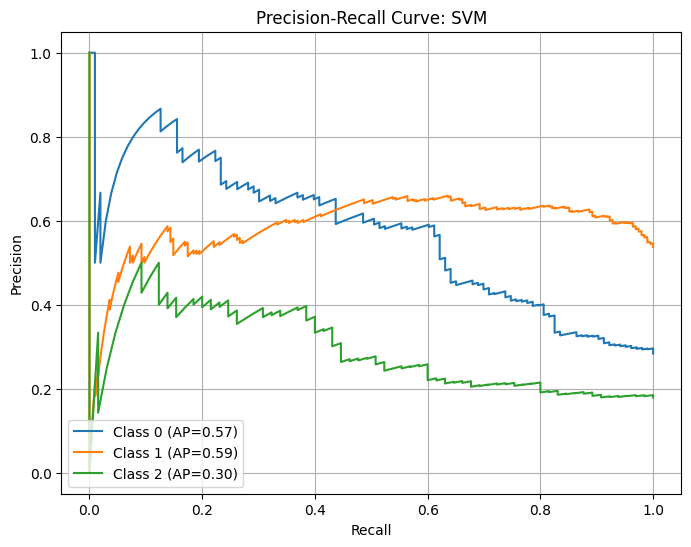

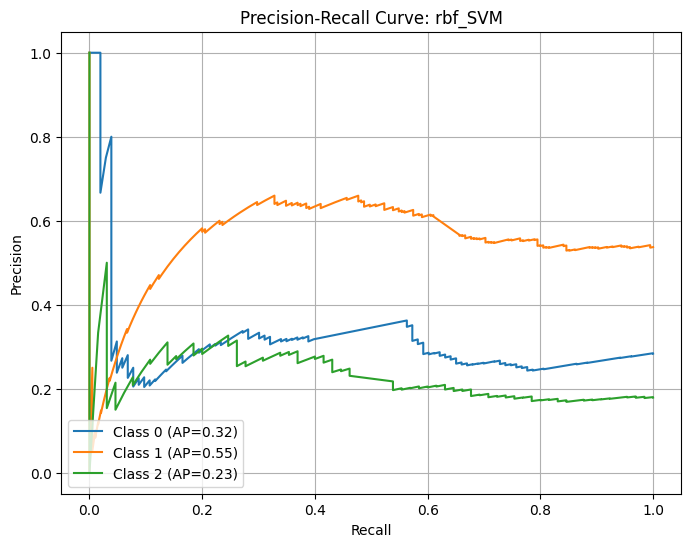

In [133]:
# Precision-Recall Curve for each class per model
# Binarize the test labels for multi-class (3 classes)
y_test_bin = label_binarize(y_test, classes=[0,1,2])
class_names = [0, 1, 2]

# Plot one figure per model
for name, model in models.items():
    plt.figure(figsize=(8,6))

    # Get scores
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    else:  # SVM without probability=True
        y_score = model.decision_function(X_test)

    # Plot PR curve for each class
    for i, class_label in enumerate(class_names):
        precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
        ap = average_precision_score(y_test_bin[:, i], y_score[:, i])
        plt.plot(recall, precision, label=f'Class {class_label} (AP={ap:.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve: {name}')
    plt.legend(loc='lower left')
    plt.grid(True)
    plt.show()


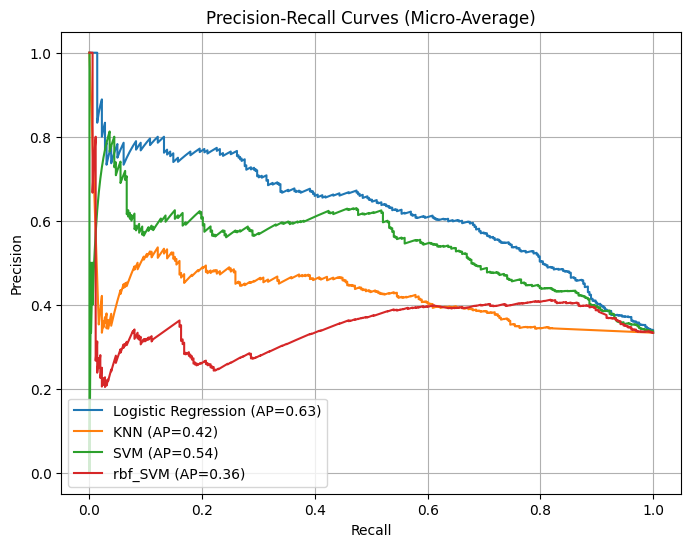

In [134]:
# Precision-Recall Curve for each model

plt.figure(figsize=(8,6))

for name, model in models.items():
    # Get scores
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    else:  # SVM without probability=True
        y_score = model.decision_function(X_test)

    # Compute micro-average PR curve and AP
    precision, recall, _ = precision_recall_curve(y_test_bin.ravel(), y_score.ravel())
    ap = average_precision_score(y_test_bin, y_score, average='micro')

    plt.plot(recall, precision, label=f'{name} (AP={ap:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves (Micro-Average)')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

In [135]:
f1_scores = {}

for name, model in models.items():
    # Predict on test set
    y_pred = model.predict(X_test)

    # Compute macro F1 score
    f1 = f1_score(y_test, y_pred, average='macro')
    f1_scores[name] = f1

print(f1_scores)

{'Logistic Regression': 0.5533323121947796, 'KNN': 0.39191244305069617, 'SVM': 0.3952264587616203, 'rbf_SVM': 0.1473533619456366}


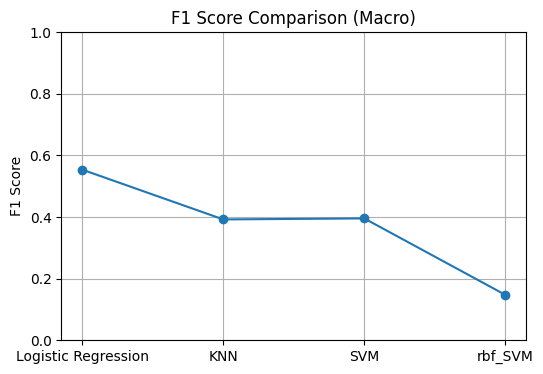

In [136]:
models = list(f1_scores.keys())
scores = list(f1_scores.values())

plt.figure(figsize=(6,4))
plt.plot(models, scores, marker='o', linestyle='-')
plt.title('F1 Score Comparison (Macro)')
plt.ylabel('F1 Score')
plt.ylim(0,1)
plt.grid(True)

Based on all the evaluation metrics on the test set, Logistic Regression is the best model. SVM performs better based on accuracy and precision-recall curve. KNN has more correctly predicted samples based on confusion matrix. SVM and KNN has the same f1 score. rbf_SVM model has a bad performance on the test set because it overfits for high-dimensional data.